# Orbit plot
Show the final step in the chains as a series of orbit traces.

In [2]:
import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt

from funcs import *

%matplotlib notebook

In [3]:
# pick a date and load the chains

d = 54542

chain = np.load('/Users/grant/a-extra/archive/fits_calx/'+str(d)+'/chains.npy')
dates = np.load('dates.npy')
print(chain.shape)
print(dates.shape)

(256, 100000, 6)
(2642,)


In [4]:
# get the times of each temporal bin (copied from fit-orbits)
ok = (dates >= d) & (dates < d+1)
d1, d2 = np.min(dates[ok]), np.max(dates[ok])
ds = np.linspace(d1, d2, int((d2 - d1)*500))

hs = (ds - ds[0]) * 24
hs_cen = (hs[1:]+hs[:-1])/2.

print(hs_cen)

[0.02506154 0.07518461 0.12530768 0.17543075 0.22555381 0.27567688
 0.32579995 0.37592303 0.4260461  0.47616917 0.52629224 0.5764153
 0.62653837 0.67666144 0.72678452 0.77690759 0.82703066 0.87715373
 0.9272768  0.97739987 1.02752294 1.07764601 1.12776908 1.17789215
 1.22801522 1.27813829 1.32826136 1.37838443 1.4285075  1.47863057
 1.52875364 1.57887671 1.62899978 1.67912285 1.72924592 1.77936899
 1.82949206 1.87961513 1.9297382  1.97986127]


In [7]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

<IPython.core.display.Javascript object>


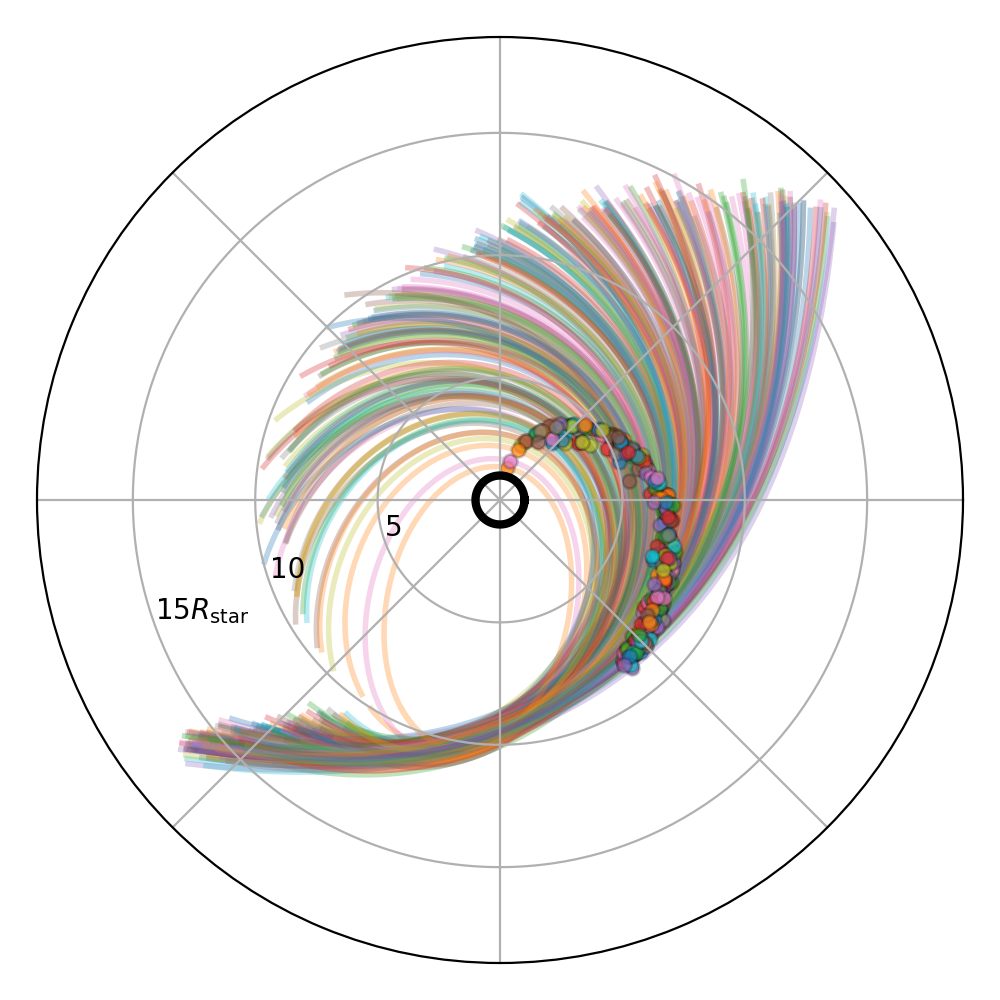

In [8]:
# look at some of the orbits
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection='polar')

for i in range(chain.shape[0]):
    p = chain[i,-1,:]
#     print(p)
    in_tr, vel, dt, f, r, x, bigy, acc = orbit_rv(p[0], p[1], p[2], np.arange(-20,40,0.1), e=p[5], testing=True)

    line = ax.plot(f-(np.pi/2-p[0]), r, alpha=0.3, linewidth=2, zorder=-i)

    rgb = list(matplotlib.colors.colorConverter.to_rgba(line[0].get_color())[:3])
    ax.plot(-(np.pi/2-p[0]), p[1], 'o', zorder=1, markersize=5, mfc=rgb+[0.7], mec=[0,0,0,0.2])#rgb+[1])

#     in_tr, vel, dt, f, r, x, bigy = orbit_rv(p[0], p[1], p[2], np.arange(hs[0],hs[-1],0.1), e=p[5], testing=True)
#     if np.sum(in_tr) > 0:
#         ax.plot(f[in_tr]-(np.pi/2-p[0]), r[in_tr], alpha=0.5, linewidth=4, color=rgb)
        
ax.plot(np.linspace(0,2*np.pi,100),np.ones(100),'black',linewidth=3)

ax.set_rticks([5,10,15])
ax.set_yticklabels(['5','10','15$R_{\\rm star}$'])
ax.set_xticklabels([])
# ax.grid(True)
ax.set_rlabel_position(200)

fig.tight_layout()
ax.set_rasterization_zorder(2)

fig.savefig('/Users/grant/astro/doc/feb-accel/orb.eps', dpi=100)